In [1]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
os.chdir("/home/xiaochen/kewen/IF_project")

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [5]:
trainset_sampled = _subsample_by_classes(trainset, [1,7], [10000]*10)

number of examples with label '1': 6742
number of examples with label '7': 6265


In [6]:
target_path = 'outputs/mnist/Identity_mnist_devId_1.json'

In [7]:
trainset_sampled[1][0]

In [8]:
os.path.abspath('.')

'/data/kewen/IF_project'

In [13]:
# JSON file
with open (target_path, "r") as f:
     data_target = json.loads(f.read())


In [19]:
data_target

{'helpful': [998,
  4387,
  4677,
  3485,
  2722,
  5737,
  159,
  2778,
  2734,
  500,
  31,
  1049,
  5935,
  6242,
  5621,
  452,
  3321,
  4698,
  3581,
  5381,
  803,
  1654,
  5386,
  3351,
  3952,
  4316,
  6673,
  2281,
  582,
  772,
  268,
  2508,
  4021,
  703,
  4409,
  5172,
  4762,
  1992,
  1395,
  5690,
  3452,
  4882,
  6014,
  1283,
  3667,
  1221,
  5974,
  5746,
  3363,
  4302,
  6297,
  6530,
  6367,
  4784,
  5132,
  6684,
  4785,
  3012,
  6330,
  2283,
  3566,
  826,
  653,
  1698,
  5570,
  1856,
  4533,
  3319,
  5520,
  792,
  4041,
  1711,
  1151,
  3560,
  636,
  1608,
  1326,
  4794,
  6676,
  4205,
  461,
  1080,
  4771,
  2269,
  5992,
  3783,
  4488,
  1307,
  2652,
  4196,
  6384,
  6262,
  711,
  3748,
  2048,
  471,
  2851,
  5,
  3618,
  4523,
  245,
  2263,
  384,
  2318,
  21,
  5128,
  2259,
  4173,
  2014,
  1541,
  4161,
  5240,
  4632,
  1790,
  6375,
  5554,
  1611,
  4013,
  137,
  2560,
  5990,
  5456,
  840,
  629,
  4191,
  1014,
  190,
  

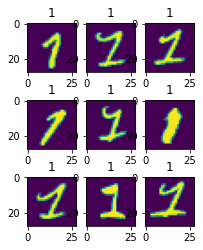

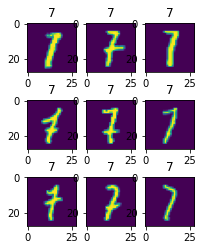

In [25]:
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['helpful'][i]][0])
    plt.title(trainset_sampled[data_target['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['harmful'][i]][0])
    plt.title(trainset_sampled[data_target['harmful'][i]][1])

In [27]:
# JSON file
groundTruthPath = 'outputs/mnist/Percy_mnist_devId_1.json'
with open (groundTruthPath, "r") as f:
     data_groundtruth = json.loads(f.read())


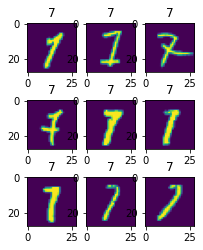

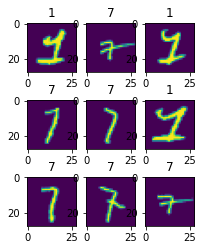

In [28]:
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['helpful'][i]][0])
    plt.title(trainset_sampled[data_groundtruth['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['harmful'][i]][0])
    plt.title(trainset_sampled[data_groundtruth['harmful'][i]][1])

In [ ]:
y =  np.array(data_groundtruth['influence'])
x = np.array(data_target['influence'])*32
Correlation = round(np.corrcoef(x,y)[0,1],3)

In [ ]:
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")

In [ ]:
x

In [ ]:
np.corrcoef(x,y)[0,1],3